# Bank Stocks Analysis

In [2]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Getting the Data
We use pandas datareader to get stock information of 6 banks from Yahoo! Finance.

In [3]:
startTime = pd.to_datetime('01-01-2006')
endTime = pd.to_datetime('01-01-2016')

In [4]:
df1 = wb.DataReader('BAC', 'yahoo', start=startTime, end=endTime)
df2 = wb.DataReader('C', 'yahoo', start=startTime, end=endTime)
df3 = wb.DataReader('GS', 'yahoo', start=startTime, end=endTime)
df4 = wb.DataReader('JPM', 'yahoo', start=startTime, end=endTime)
df5 = wb.DataReader('MS', 'yahoo', start=startTime, end=endTime)
df6 = wb.DataReader('WFC', 'yahoo', start=startTime, end=endTime)

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [6]:
bank_stocks = pd.concat([df1,df2,df3,df4,df5,df6],keys=tickers,axis=1)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364254  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009907  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052422  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002819  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024086  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224960  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249138  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345779  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382019  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756580  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104456  
2006-01-04   31.799999  31.530001  10870000.0  19.871275  
2006-01-05   31.500000  31.495001  10158000.0  19.849203  
2006-01-06   31.580000  31.680000   8403800.0  19.965799  
2006-01-09   31.674999  31.674999   5619600.0  19.962656  

[5 rows x 36 columns]

## EDA

In [9]:
bank_stocks.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Creating a new dataframe to stores returns for each bank's stock

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [12]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [13]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [14]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [16]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

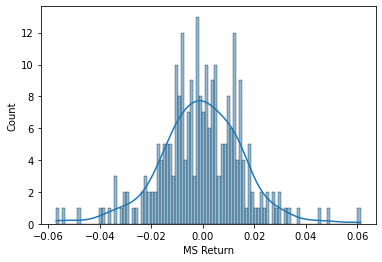

In [17]:
sns.histplot(data=returns['MS Return'].loc['2015-01-01':'2015-12-31'],bins=100,kde=True)

<AxesSubplot:xlabel='C Return', ylabel='Count'>

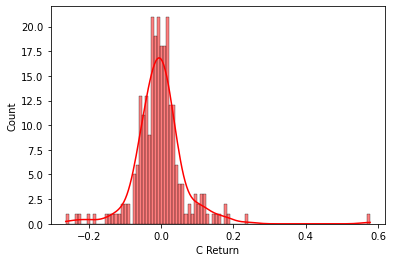

In [18]:
sns.histplot(data=returns['C Return'].loc['2008-01-01':'2008-12-31'],bins=100,kde=True,color='red')

In [19]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Date'>

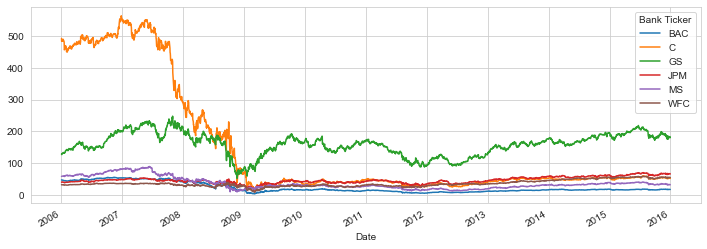

In [20]:
bank_stocks.xs(key='Close',axis=1,level=1).plot(figsize=(12,4))

In [21]:
bank_stocks.xs(key='Close',axis=1,level=1).iplot()

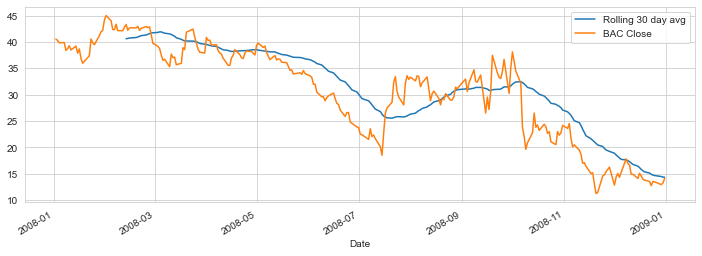

In [22]:
plt.figure(figsize=(12,4))
df1['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='Rolling 30 day avg')
df1['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:>

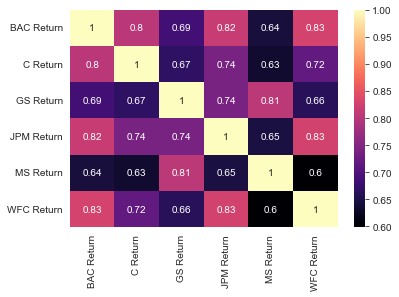

In [23]:
sns.heatmap(returns.corr(),cmap='magma',annot=True)

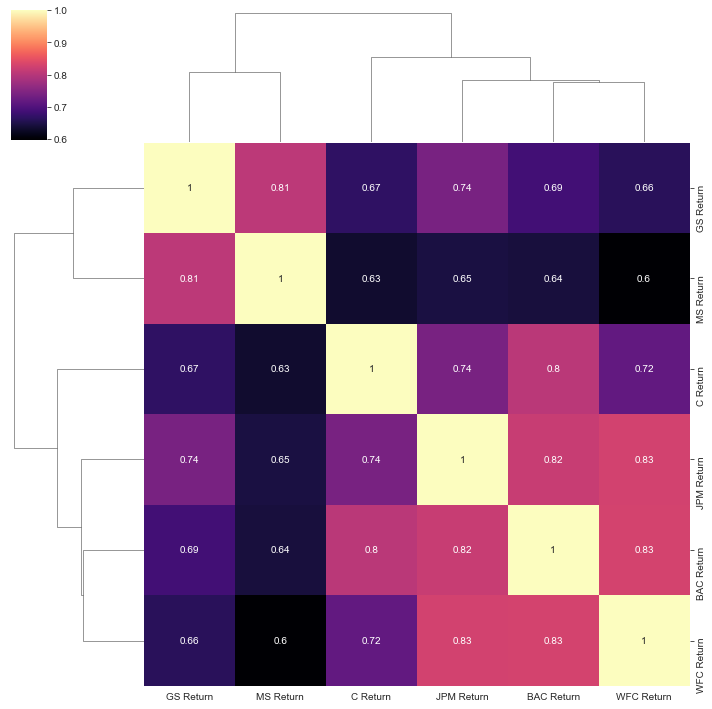

In [24]:
sns.clustermap(returns.corr(),cmap='magma',annot=True)

In [27]:
df1[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')